In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
from tqdm import tnrange

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(r"/content/gdrive/MyDrive/music/120_final.csv")

In [ ]:
df1 = pd.read_csv(r"/content/gdrive/MyDrive/music/120-160_kl_final.csv")
df2 = pd.read_csv(r"/content/gdrive/MyDrive/music/120_TO_160_1.csv")

In [ ]:
df

In [ ]:
df1

,Index,Desired BPM,Array 1,Array 2
0,0,180,60.000000,32.243956
1,1,180,60.000000,32.243956
2,2,180,60.000000,32.243956
3,3,180,60.000000,32.243956
4,4,180,60.000000,32.243956
...,...,...,...,...
1466,1466,180,160.297327,149.884210
1467,1467,180,160.297327,149.884210
1468,1468,180,160.297327,149.884210
1469,1469,180,160.297327,149.884210


In [ ]:
df2

,Index,Desired BPM,Array 1,Array 2
0,0.0,180.0,125.696434,126.755556
1,1.0,180.0,125.696434,126.755556
2,2.0,180.0,125.696434,126.755556
3,3.0,180.0,125.696434,126.755556
4,4.0,180.0,125.696434,126.755556
...,...,...,...,...
1437,1437.0,180.0,164.898676,160.354930
1438,1438.0,180.0,164.898676,160.354930
1439,1439.0,180.0,164.898676,160.354930
1440,1440.0,180.0,164.898676,160.354930


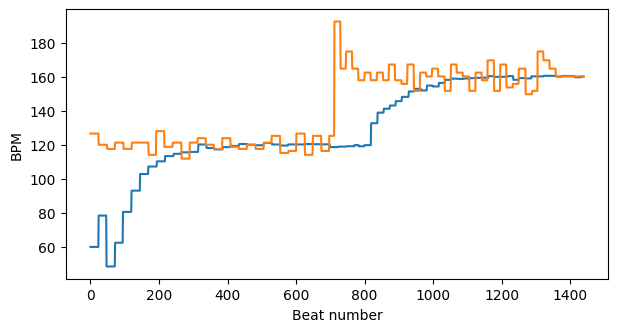

In [ ]:
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(df1["Array 1"][0:1440])
# plt.plot(na ,sot)
plt.plot(df2["Array 2"][0:1440])
plt.show()

In [ ]:
array2 = df["Array 2"][0:334]

In [ ]:
array2 = df2["Array 2"]

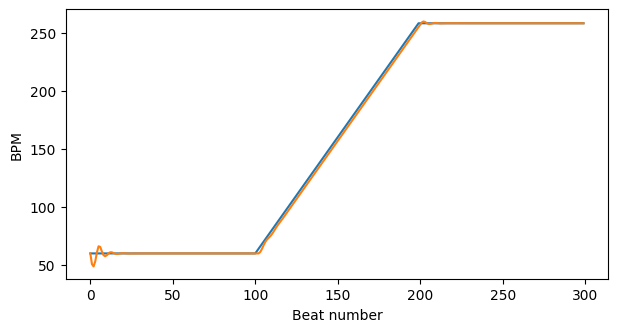

In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = np.eye(2) * 0.1     # tunable parameter
R = 0.1                 # tunable parameter
P_n = Q*1
z_n = 1
BPM_n = 60
x_n = np.array([[0,1]]).T
utot = []
ub = []
sot = []
eb = []
na = []

for n in range(300):
    K_n = P_n @ H.T / (H @ P_n @ H.T + R)
    x_n = Phi @ x_n +  K_n @ (z_n - H @ x_n)       # x_n+1
    P_n = Phi @ (1 - K_n @ H) @ P_n @ Phi.T + Q   # P_n+1
    z_n += 60/BPM_n       # z_n+1


    # BPM_n = array2[n]
    if (n>100 and n<200):
      BPM_n += 2


    utot.append(z_n)
    ub.append(BPM_n)
    sot.append(x_n[0])
    eb.append(60/x_n[1])
    na.append(n)
    # print(x_n.T, z_n)
    # plt.scatter(n, z_n, s=20, c='k') #, label='user tap onset time')
    # plt.scatter(n, BPM_n, s=20, c='r') #, label='user BPM')
    # plt.scatter(n, x_n[0], s=15, c='g') #, label='stroke onset time')
    # plt.scatter(n, 60/x_n[1], s=15, c='y') #, label='estimated BPM')
    # plt.pause(0.05)
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(na ,ub)
# plt.plot(na ,sot)
plt.plot(na ,eb)
plt.show()

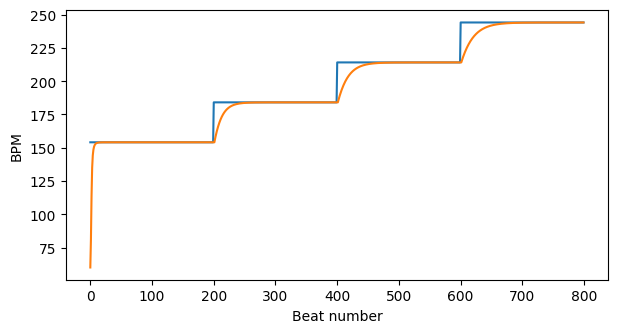

In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = np.eye(2) * 0.1     # tunable parameter
# Q = np.array([[0,0],[0,0.1]])
R = 0.1                 # tunable parameter
P_n = Q*1
z_n = 1
BPM_n = array2[0]
x_n = np.array([[0,1]]).T

utot = []
ub = []
sot = []
eb = []
na = []
gt = []

for n in range(len(array2)):

    K_n = Phi @ P_n @ Phi.T @ H.T / (H @ Phi @ P_n @ Phi.T @ H.T + R)
    x_n = Phi @ x_n + K_n @ (z_n - H @ Phi @ x_n)       # x_n+1
    P_n = (1 - K_n @ H) * (Phi @ P_n @ Phi.T + Q)   # P_n+1
    z_n += 60/BPM_n       # z_n+1


    # BPM_n = array2[n]
    if (n%200 == 0):
      BPM_n += 30

    # print(x_n.T, z_n)
    utot.append(z_n)
    ub.append(BPM_n)
    sot.append(x_n[0])
    eb.append(60/x_n[1])
    na.append(n)
    gt.append(120)
    # plt.scatter(n, z_n, s=20, c='k') #, label='user tap onset time')
    # plt.scatter(n, BPM_n, s=20, c='r') #, label='user BPM')
    # plt.scatter(n, x_n[0], s=15, c='g') #, label='stroke onset time')
    # plt.scatter(n, 60/x_n[1], s=15, c='y') #, label='estimated BPM')
    # plt.pause(0.05)
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(na ,ub)
# plt.plot(na ,sot)
plt.plot(na ,eb)
# plt.plot(na, df["Array 1"][0:333])
# plt.plot(na, gt)
# plt.legend(['Desired BPM','No Controller','P-Controller','PI-Controller'])
# plt.savefig("figure5.jpeg",dpi=800)
plt.show()

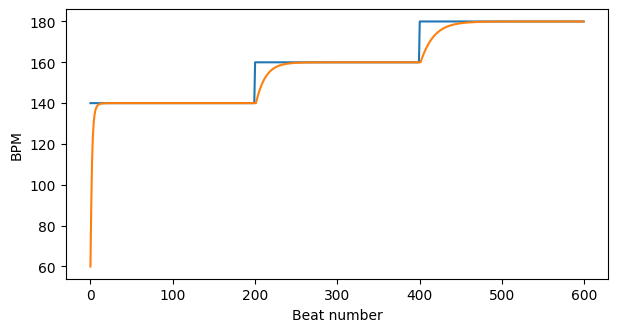

0


In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = np.eye(2) * 1000    # tunable parameter
Q = np.array([[1000,0], [0,10000000000]])
R = 0.0001           # tunable parameter
P_n = Q*1
z_n = 1
BPM_n = 120
x_n = np.array([[0,1]]).T

utot = []
ub = []
sot = []
eb = []
na = []
gt = []
miny = 1000000000
savei = 0
savej = 0
sum = 0

# for i in tnrange(10, 100):
#   for j in range(1, 20):
#     Q = np.eye(2) * i * 1     # tunable parameter
#     R = j * 0.002
#     sum = 0
#     BPM_n = 120
#     x_n = np.array([[0,1]]).T
#     z_n = 1
#     P_n = Q*1
for n in range(600):
  K_n = Phi @ P_n @ Phi.T @ H.T / (H @ Phi @ P_n @ Phi.T @ H.T + R)
  x_n = Phi @ x_n + K_n @ (z_n - H @ Phi @ x_n)       # x_n+1
  P_n = (1 - K_n @ H) * (Phi @ P_n @ Phi.T + Q)   # P_n+1
  z_n += 60/BPM_n       # z_n+1
  # BPM_n = array2[n]
  if (n%200==0):
    BPM_n += 20
  # print(x_n.T, z_n)
  utot.append(z_n)
  ub.append(BPM_n)
  sot.append(x_n[0])
  eb.append(60/x_n[1])
  na.append(n)
  gt.append(120)
    #   sum +=  abs((60/x_n[1]) - (BPM_n) )
    # if (sum <= miny):
    #   savei = i
    #   savej = j
    #   miny = sum
    #   print(sum)


plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(na ,ub)
# plt.plot(na ,sot)
plt.plot(na ,eb)
# plt.plot(na, df["Array 1"][0:333])
# plt.plot(na, gt)
# plt.legend(['Desired BPM','No Controller','P-Controller','PI-Controller'])
# plt.savefig("figure5.jpeg",dpi=800)
plt.show()
print(sum)

In [ ]:
miny

array([817.28779594])

In [ ]:
print(savei)
print(savej)

99
1


In [ ]:
array2

0      124.026087
1      124.026087
2      106.807477
3      106.807477
4      132.595349
          ...    
329    117.694845
330    117.694845
331    132.595349
332    132.595349
333    132.595349
Name: Array 2, Length: 334, dtype: float64

In [ ]:
Q = np.eye(2) * 0.01     # tunable parameter
print(Q)

[[0.01 0.  ]
 [0.   0.01]]


[[22134.65462222 20301.        ]
 [ 2033.65466784   202.        ]]
[[22350.81798383 20503.        ]
 [ 2048.818029     203.        ]]
[[22568.01870463 20706.        ]
 [ 2064.01874936   204.        ]]
[[22786.25669225 20910.        ]
 [ 2079.25673656   205.        ]]
[[23005.53185502 21115.        ]
 [ 2094.5318989    206.        ]]
[[23225.84410193 21321.        ]
 [ 2109.84414539   207.        ]]
[[23447.19334263 21528.        ]
 [ 2125.19338568   208.        ]]
[[23669.57948744 21736.        ]
 [ 2140.57953008   209.        ]]
[[23893.00244731 21945.        ]
 [ 2156.00248956   210.        ]]
[[24117.46213387 22155.        ]
 [ 2171.46217572   211.        ]]
[[24342.95845934 22366.        ]
 [ 2186.9585008    212.        ]]
[[24569.49133659 22578.        ]
 [ 2202.49137767   213.        ]]
[[24797.0606791 22791.       ]
 [ 2218.0607198   214.       ]]
[[25025.66640097 23005.        ]
 [ 2233.6664413    215.        ]]
[[25255.3084169  23220.        ]
 [ 2249.30845685   216.        ]]

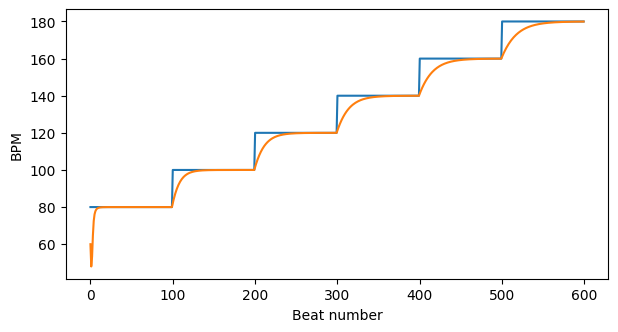

In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = [[0,0], [0,1]]    # tunable parameter
R = 1       # tunable parameter
P_n_dash = Q*1
z_n = 0
BPM_n = 60
x_n_dash = np.array([[0,1]]).T

utot = []
ub = []
sot = []
eb = []
na = []
gt = []
cd = []

for n in range(600):
    K_n = P_n_dash @ H.T / (H @ P_n_dash @ H.T + R)
    if (n>200 and n<220):
      print(P_n_dash)
    if (n%100==0):
      BPM_n += 20
    z_n += 60/BPM_n       # z_n+1
    x_n = x_n_dash + K_n @ (z_n - H @ x_n_dash)       # x_n+1
    P_n = (1 - K_n @ H) * P_n_dash   # P_n+1
    x_n_dash = Phi @ x_n
    P_n_dash = (Phi @ P_n @ Phi.T) + Q
    # BPM_n = array2[n]
    # if (n>100 and n<200):
    #   BPM_n += 2
    # print(x_n.T, z_n)
    utot.append(z_n)
    ub.append(BPM_n)
    if (n==0):
      eb.append(60/(x_n[1]))
    else:
      # eb.append(60/(x_n[0] - sot[-1]))
      eb.append(60/(x_n[1]))
    sot.append(x_n[0])
    na.append(n)
    gt.append(120)
    cd.append(x_n[1])
    # plt.scatter(n, z_n, s=20, c='k') #, label='user tap onset time')
    # plt.scatter(n, BPM_n, s=20, c='r') #, label='user BPM')
    # plt.scatter(n, x_n[0], s=15, c='g') #, label='stroke onset time')
    # plt.scatter(n, 60/x_n[1], s=15, c='y') #, label='estimated BPM')
    # plt.pause(0.05)
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(na ,ub)
# plt.plot(na ,sot)
plt.plot(na ,eb)
# plt.plot(na, df["Array 1"][0:333])
# plt.plot(na, gt)
# plt.legend(['Desired BPM','No Controller','P-Controller','PI-Controller'])
# plt.savefig("figure5.jpeg",dpi=800)
plt.show()

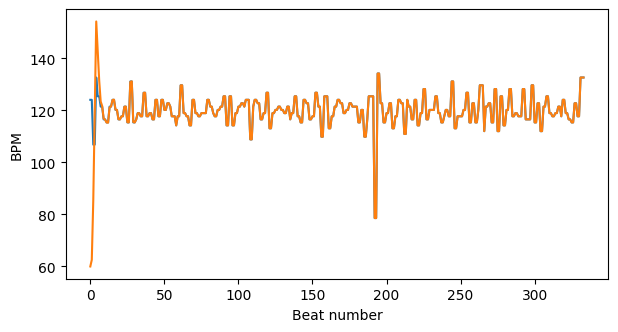

In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = [[2,0], [0,2]]    # tunable parameter
R = 10        # tunable parameter
P_n_dash = Q*1
z_n = 0
BPM_n = array2[0]
x_n_dash = np.array([[0,1]]).T

utot = []
ub = []
sot = []
eb = []
na = []
gt = []
cd = []

for n in range(len(array2)):
    K_n = P_n_dash @ H.T / (H @ P_n_dash @ H.T + R)
    # if (n%100==0):
    #   BPM_n += 20
    BPM_n = array2[n]
    z_n += 60/BPM_n       # z_n+1
    x_n = x_n_dash + K_n @ (z_n - H @ x_n_dash)       # x_n+1
    P_n = (1 - K_n @ H) * P_n_dash   # P_n+1
    x_n_dash = Phi @ x_n
    P_n_dash = (Phi @ P_n @ Phi.T) + Q
    BPM_n = array2[n]
    utot.append(z_n)
    ub.append(BPM_n)
    if (n==0):
      eb.append(60/(x_n[1]))
    else:
      eb.append(60/(x_n[0] - sot[-1]))
    sot.append(x_n[0])
    na.append(n)
    gt.append(120)
    cd.append(x_n[1])
    # plt.scatter(n, z_n, s=20, c='k') #, label='user tap onset time')
    # plt.scatter(n, BPM_n, s=20, c='r') #, label='user BPM')
    # plt.scatter(n, x_n[0], s=15, c='g') #, label='stroke onset time')
    # plt.scatter(n, 60/x_n[1], s=15, c='y') #, label='estimated BPM')
    # plt.pause(0.05)
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na ,utot)
plt.plot(na ,ub)
# plt.plot(na ,sot)
plt.plot(na ,eb)
# plt.plot(na, df["Array 1"][0:333])
# plt.plot(na, gt)
# plt.legend(['Desired BPM','No Controller','P-Controller','PI-Controller'])
# plt.savefig("figure5.jpeg",dpi=800)
plt.show()

In [ ]:
print(utot[190:300])
print(sot[190:300])
print(cd[190:300])

[129.59999999999948, 130.19999999999948, 130.79999999999947, 131.39999999999947, 131.99999999999946, 132.59999999999945, 133.19999999999945, 133.79999999999944, 134.39999999999944, 134.99999999999943, 135.49999999999943, 135.99999999999943, 136.49999999999943, 136.99999999999943, 137.49999999999943, 137.99999999999943, 138.49999999999943, 138.99999999999943, 139.49999999999943, 139.99999999999943, 140.49999999999943, 140.99999999999943, 141.49999999999943, 141.99999999999943, 142.49999999999943, 142.99999999999943, 143.49999999999943, 143.99999999999943, 144.49999999999943, 144.99999999999943, 145.49999999999943, 145.99999999999943, 146.49999999999943, 146.99999999999943, 147.49999999999943, 147.99999999999943, 148.49999999999943, 148.99999999999943, 149.49999999999943, 149.99999999999943, 150.49999999999943, 150.99999999999943, 151.49999999999943, 151.99999999999943, 152.49999999999943, 152.99999999999943, 153.49999999999943, 153.99999999999943, 154.49999999999943, 154.99999999999943,

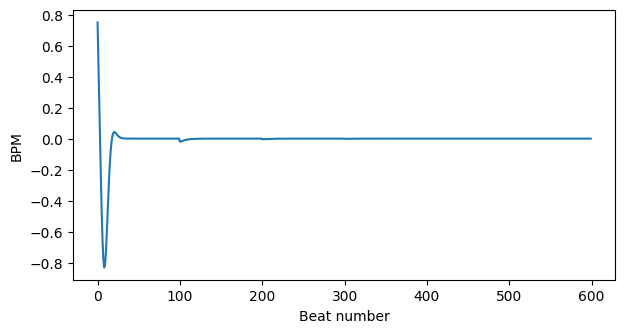

In [ ]:
ok = []
nk =[]
for i in range(len(utot)):
  nk.append(i)
  ok.append(utot[i] - sot[i])
plt.figure(figsize=(7,3.5))
plt.xlabel('Beat number')
plt.ylabel('BPM')
plt.plot(nk ,ok)

In [ ]:
utot

[2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 103.96774193548387,
 104.90524193548387,
 105.81433284457478,
 106.69668578575124,
 107.5538286428941,
 108.38716197622743,
 109.19797278703824,
 109.98744647124876,
 110.75667724047953,
 111.50667724047953,
 112.2383845575527,
 112.95267027183841,
 113.65034469044306,
 114.33216287226125

In [ ]:
sot

[array([1.5]),
 array([2.90909091]),
 array([4.17588346]),
 array([5.23479839]),
 array([6.13079632]),
 array([6.98741905]),
 array([7.9068372]),
 array([8.91445626]),
 array([9.97191042]),
 array([11.02474189]),
 array([12.04210372]),
 array([13.02682037]),
 array([14.00080301]),
 array([14.98422789]),
 array([15.98373122]),
 array([16.99347854]),
 array([18.00353306]),
 array([19.00756354]),
 array([20.00538002]),
 array([21.00070551]),
 array([21.99738048]),
 array([22.99694445]),
 array([23.9985634]),
 array([25.00045183]),
 array([26.0013397]),
 array([27.00106045]),
 array([28.00023247]),
 array([28.99957708]),
 array([29.9994334]),
 array([30.99969478]),
 array([32.00004496]),
 array([33.00023359]),
 array([34.00020581]),
 array([35.00006144]),
 array([35.99993424]),
 array([36.99989627]),
 array([37.99993691]),
 array([39.00000102]),
 array([40.00004001]),
 array([41.00003938]),
 array([42.00001465]),
 array([42.99999031]),
 array([43.99998126]),
 array([44.99998724]),
 array([

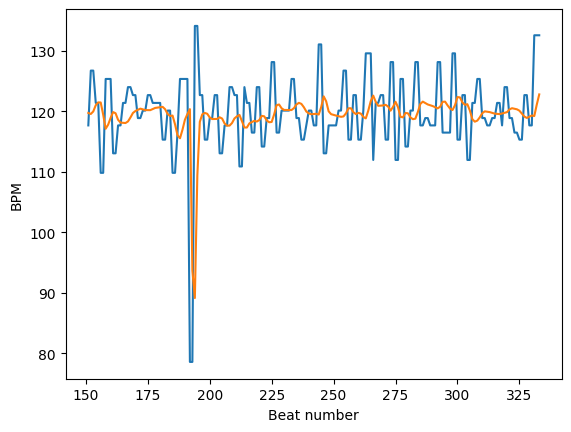

In [ ]:
Phi = np.array([[1,1],[0,1]])
H = np.array([[1,0]])
Q = np.eye(2) * 10000    # tunable parameter
R = 0             # tunable parameter
P_n_dash = Q*1
z_n = 1
BPM_n = array2[0]
x_n = np.array([[0,1]]).T
x_n_dash = np.array([[0,1]]).T


P = np.array([[0,1]])
Id = np.array([[1,1]]).T

utot = []
ub = []
sot = []
eb = []
na = []
gt = []
compare = []

for n in range(800):

    cx = abs((60/x_n[1]) - BPM_n)
    for i in range( int (cx/4) ):
      K_n = P_n_dash @ H.T / (H @ P_n_dash @ H.T + R)

      x_n = x_n_dash + K_n @ (z_n - H @ x_n_dash)       # x_n+1
      P_n = (1 - K_n @ H) * P_n_dash   # P_n+1
      x_n_dash = Phi @ x_n
      P_n_dash = (Phi @ P_n @ Phi.T) + Q
      z_n += 60/BPM_n       # z_n+1

    K_n = P_n_dash @ H.T / (H @ P_n_dash @ H.T + R)

    # else:
    #   K_n = P_n_dash @ H.T / (H @ P_n_dash @ H.T + R)

    x_n = x_n_dash + K_n @ (z_n - H @ x_n_dash)       # x_n+1
    P_n = (1 - K_n @ H) * P_n_dash   # P_n+1
    x_n_dash = Phi @ x_n
    P_n_dash = (Phi @ P_n @ Phi.T) + Q
    z_n += 60/BPM_n       # z_n+1

    BPM_n = array2[n]

    # if (n%200==0):
    #   BPM_n += 40

    # BPM_n = array2[n]
    # if (abs((60/x_n[1]) - BPM_n) >= 0.15*(60/x_n[1])):
    #   z_n += 60/BPM_n       # z_n+1
    #   x_n = Phi @ x_n +  (0.9* ((z_n - H @ x_n) - (P @ x_n))) * Id      # x_n+1
    #   # print((60/x_n[1]))
    #   # print(BPM_n)
    # # z_n += 60/BPM_n       # z_n+1
    # else:
    #   z_n += 60/BPM_n       # z_n+1
    #   x_n = Phi @ x_n +  (0.22* ((z_n - H @ x_n) - (P @ x_n))) * Id      # x_n+1

    utot.append(z_n)
    ub.append(BPM_n)
    sot.append(x_n[0])
    eb.append(60/x_n[1])
    na.append(n)
    gt.append(120)
    compare.append(df2["Array 1"][n])

# plt.figure(figsize=(15,10))
plt.xlabel('Beat number')
plt.ylabel('BPM')
# plt.plot(na[180:220] ,utot[180:220], c="r")
plt.plot(na[150:] ,ub[150:])
# plt.plot(na[180:220] ,sot[180:220], c="b")
plt.plot(na[150:] ,eb[150:])
# plt.plot(na[150:] , compare[150:])
# plt.plot(na, df["Array 1"][0:333])
# plt.plot(na, gt)
# plt.legend(['Desired BPM','No Controller','P-Controller','PI-Controller'])
# plt.savefig("figure5.jpeg",dpi=800)
plt.show()